In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
variable = pd.read_csv(r"C:\Users\preet\Documents\headbrain.csv")
variable.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [3]:
variable.shape

(237, 4)

In [4]:
variable.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [5]:
variable.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [10]:
x = variable.iloc[:,:-1].values
y = variable.iloc[:,3].values

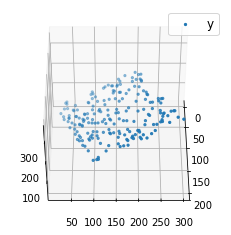

In [16]:
def generate_dataset(n): 
    x = [] 
    y = [] 
    random_x1 = np.random.rand() 
    random_x2 = np.random.rand() 
    for i in range(n): 
        x1 = i 
        x2 = i/2 + np.random.rand()*n 
        x.append([1, x1, x2]) 
        y.append(random_x1 * x1 + random_x2 * x2 + 1) 
    return np.array(x), np.array(y) 
  
x, y = generate_dataset(200) 
  
plt.rcParams['legend.fontsize'] = 12
  
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', s = 5) 
ax.legend() 
ax.view_init(45, 0) 
  
plt.show()

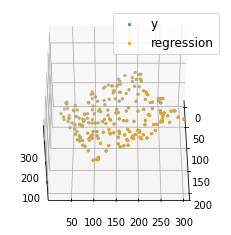

In [19]:
def mse(coef, x, y): 
    return np.mean((np.dot(x, coef) - y)**2)/2
  
def gradients(coef, x, y): 
    return np.mean(x.transpose()*(np.dot(x, coef) - y), axis = 1) 
  
def multilinear_regression(coef, x, y, lr, b1 = 0.9, b2 = 0.999, epsilon = 1e-8): 
    prev_error = 0
    m_coef = np.zeros(coef.shape) 
    v_coef = np.zeros(coef.shape) 
    moment_m_coef = np.zeros(coef.shape) 
    moment_v_coef = np.zeros(coef.shape) 
    t = 0
  
    while True: 
        error = mse(coef, x, y) 
        if abs(error - prev_error) <= epsilon: 
            break
        prev_error = error 
        grad = gradients(coef, x, y) 
        t += 1
        m_coef = b1 * m_coef + (1-b1)*grad 
        v_coef = b2 * v_coef + (1-b2)*grad**2
        moment_m_coef = m_coef / (1-b1**t) 
        moment_v_coef = v_coef / (1-b2**t) 
  
        delta = ((lr / moment_v_coef**0.5 + 1e-8) * 
                 (b1 * moment_m_coef + (1-b1)*grad/(1-b1**t))) 
  
        coef = np.subtract(coef, delta) 
    return coef 
  
coef = np.array([0, 0, 0]) 
c = multilinear_regression(coef, x, y, 1e-1) 
fig = plt.figure() 
ax = fig.gca(projection ='3d') 
  
ax.scatter(x[:, 1], x[:, 2], y, label ='y', 
                s = 5, color ="dodgerblue") 
  
ax.scatter(x[:, 1], x[:, 2], c[0] + c[1]*x[:, 1] + c[2]*x[:, 2], 
                    label ='regression', s = 5, color ="orange") 
  
ax.view_init(45, 0) 
ax.legend() 
plt.show()

In [22]:
X = variable['Head Size(cm^3)'].values
Y = variable['Brain Weight(grams)'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

0.26342933948939945 325.57342104944223


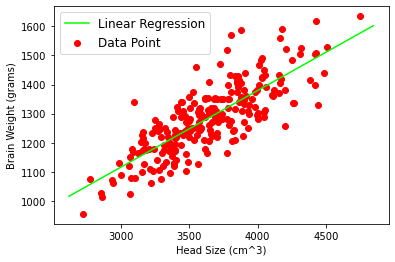

In [23]:
#plotting values 
x_max = np.max(X) + 100
x_min = np.min(X) - 100
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('Head Size (cm^3)')
#y-axis label
plt.ylabel('Brain Weight (grams)')
plt.legend()
plt.show()

In [24]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [26]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.6393117199570003
